<a href="https://colab.research.google.com/github/BalaramPanigrahy/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Import Data and Required Libraries**

In [ ]:
#importing the required packages
import pandas as pd
import numpy as np
#import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting of google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#insert the data file 
bike = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT - ALMA BETTER/BIKE DEMAND SHARING PREDICTION/SeoulBikeData.csv', encoding = 'unicode_escape')


**This dataframe presents the rented bike count in this city of Seoul. It is presented as a time series which presents the data with interval of  an hour.
For each hour, the dataframe mainly presents weather conditions and information about the day.**

In [ ]:
bike.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#Getting the shape of dataset with rows and columns
print(bike.shape)

(8760, 14)


***The above data set contains 8760 records of 14 different features of e very single day of each one hour interval of time of one year i.e, from 1.12.2017 to 31.11.2018.***

In [ ]:
#Getting all the column name of the seoul bike data set
print("Features of the dataset:")
bike.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#**Variable presentation**
**Here are all the columns of the DataSet :**



*  **Date : The day of the day, during 365 days, type : str**

*   **Rented Bike Count : Number of rented bikes per hour which is the target, type : int**

*   **Hour: The hour of the day, type : int**

*   **Temperature(°C): Temperature per hour, type : Float**

*   **Humidity(%): Humidity in the air in %, type : int**
*   **Wind speed (m/s) : Speed of the wind in m/s, type : Float**


*   **Visibility (10m): Visibility in m, type : int**


*   **Dew point temperature(°C): Temperature at the beggining of the day, type : Float**
*   **Solar Radiation (MJ/m2): Sun contribution, type : Float**




*   **Rainfall(mm): Amount of rain in mm, type : Float**



*   **Snowfall (cm): Amount of snow in cm, type : Float**
  

*   **Seasons: Season of the year, type : str**


*   **Holiday: If it is holiday period, type: str**

*   **Functioning Day: If it is a Functioning Day, type : str**



In [ ]:
# Data types
bike.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

**we have 3 types of data tyeps are here such as object, intiger and float**

In [ ]:
# statistical description
bike.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


***Statistical description of the seoul bike data set***

In [ ]:
# Getting Unique Values
bike.apply(lambda x:  len(x.unique()))

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

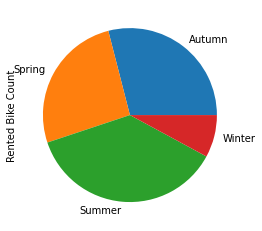

In [ ]:
# get the pie plot according to season wise
bike.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

*   **From the above pie-chart we came to know that most of the bike booked for renton Summer season and then Autumn and then in Spring and then very less number of bike booked for rent in Winter season.** 
*   **In simple word most of the bike booked for rent insummer season and the less number of bike booked for rent in winter season.**

*   **In summer season because of high temperature most of the customer likes to go through bike and in winter season due to very less temperature less number of bike was being booked for rent.**





# **Processing the Data set**

In [ ]:
#check for count of missing values in each column.
bike.isna().sum()
bike.isnull().sum()
#as we see there are no missing values present in nay column.

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**From the above we conclude that there is no null value in our data set.**

#**Exploratory Data Analysis**

[Text(0.5, 1.0, 'Count of bikes during holiday and no holiday')]

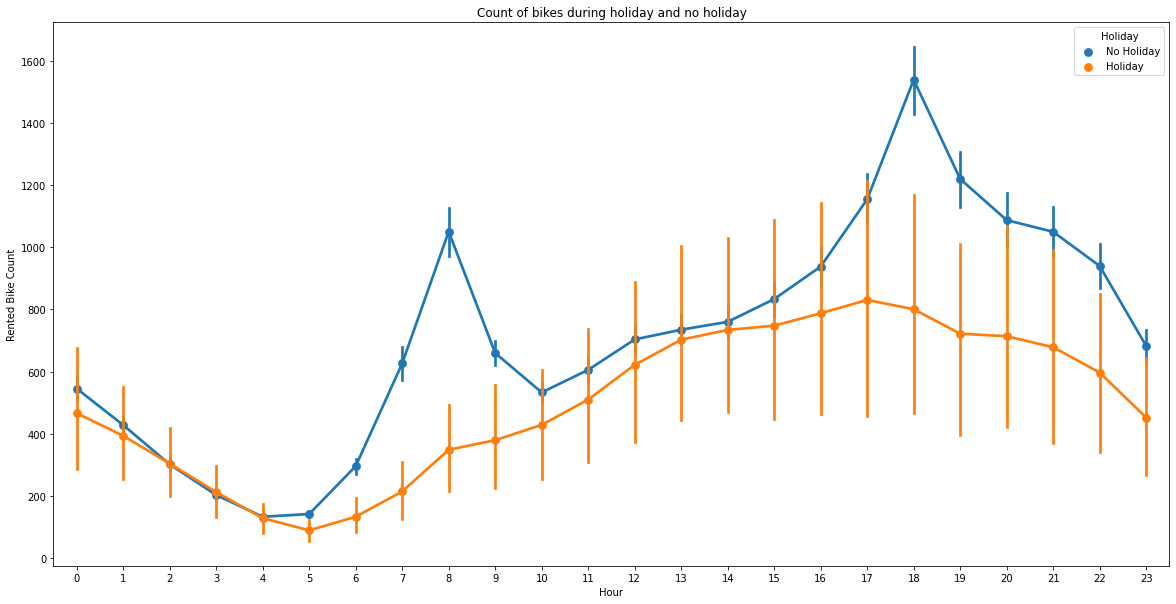

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=bike, x='Hour', y='Rented Bike Count', hue='Holiday', ax=ax)
ax.set(title='Count of bikes during holiday and no holiday')

###**Count of rented bikes during holiday and no holiday**





*   **The above chart shows the relationship between the rented bike count with the hour.**
*   **From the above chart the blue colour line shows the no holiday or weekday and the orange color line shows the bike count for rent on holiday.**

*   **From the above in no holidays most of the bikes were being booked for rent during mornign and again from 4 pm to 6 pm and again decreasing gradually.**
*   **During holidays most of the bikes were being booked in between 10 A.M to 5 P.M and then gradually decreasing the bike rent count.**







[Text(0.5, 1.0, 'Count of bikes during different Seasons')]

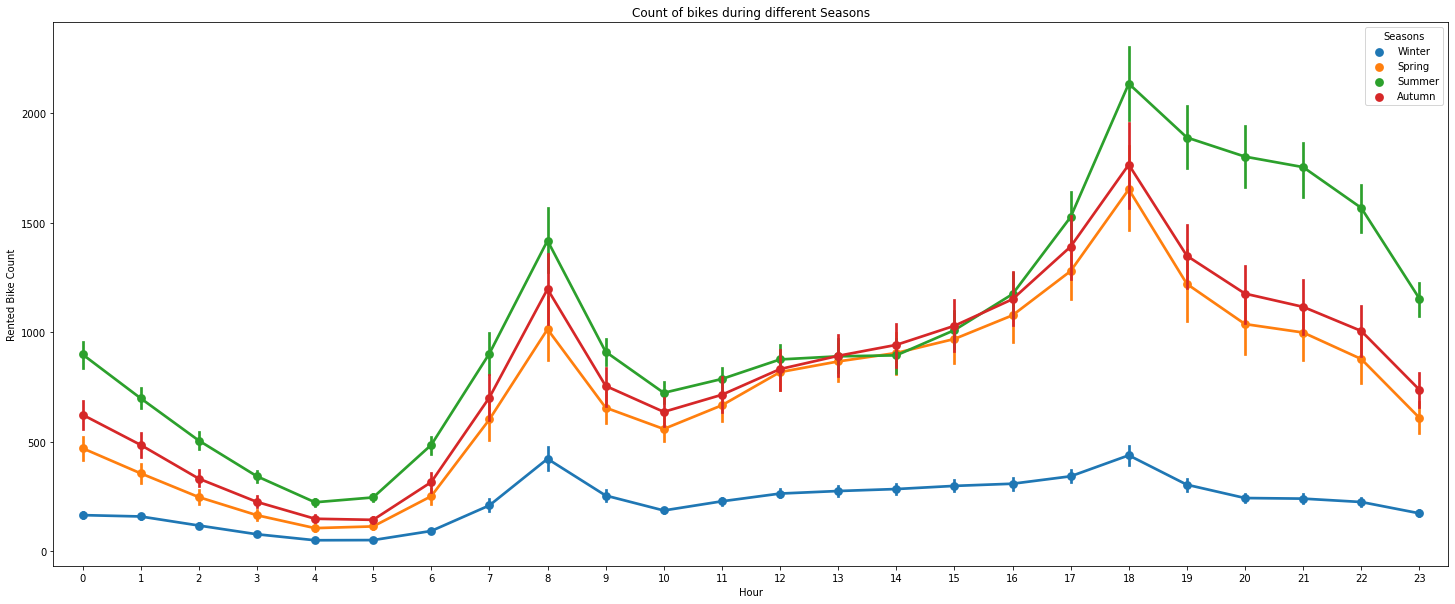

In [ ]:
#Count of bikes during different weathers
fig, ax = plt.subplots(figsize=(25,10))
sns.pointplot(data=bike, x='Hour', y='Rented Bike Count', hue='Seasons', ax=ax)
ax.set(title='Count of bikes during different Seasons')

*   **From the above chart we came to know that most of the bike booked for renton Summer season and then Autumn and then in Spring and then very less number of bike booked for rent in Winter season.**

*   **In every season morning 7 A.M to 9 A.M the bikes for rent are getting booked but it is less as compared to the count of bike booking for rent from 5 P.M to 8 P.M.**




In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

[Text(0.5, 1.0, 'Count of bikes during different dates')]

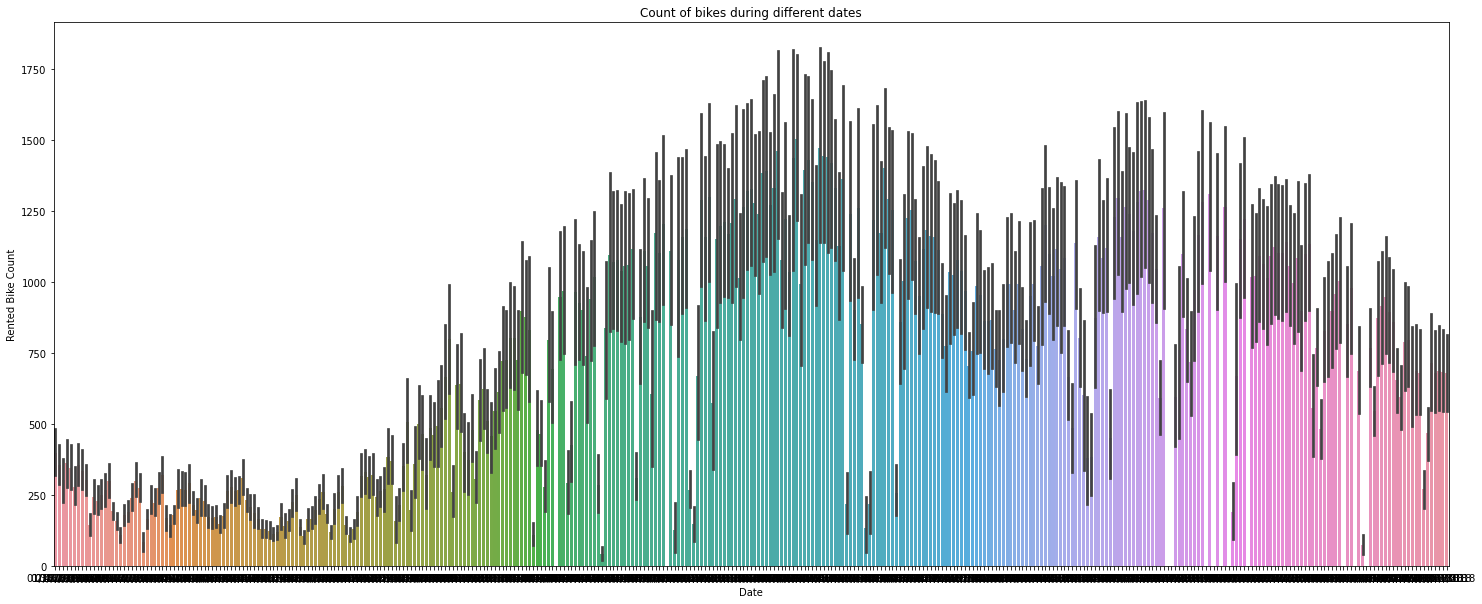

In [ ]:

fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(data=bike, x='Date', y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes during different dates')

#**Comparing Each Independent Variable With Our Target One**


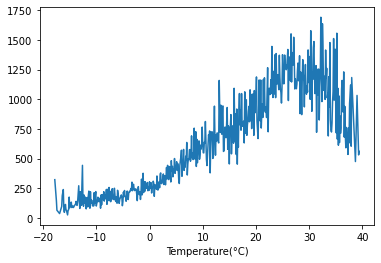

In [ ]:
# visualisation for the temp at which bikes were booked
bike.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

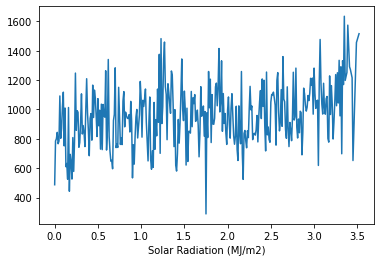

In [ ]:

bike.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()


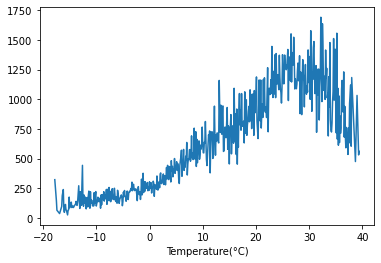

In [ ]:
bike.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

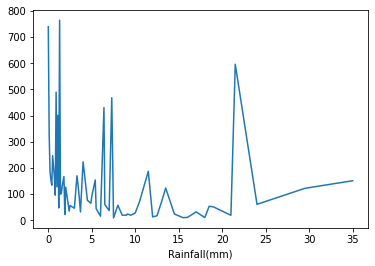

In [ ]:
bike.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()


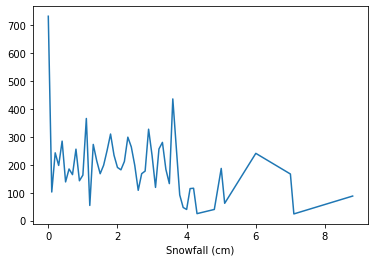

In [ ]:
bike.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

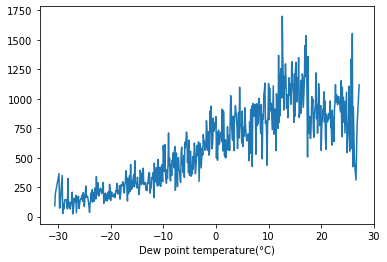

In [ ]:
bike.groupby('Dew point temperature(°C)').mean()['Rented Bike Count'].plot()

[Text(0.5, 1.0, 'Count of bikes during different Hours')]

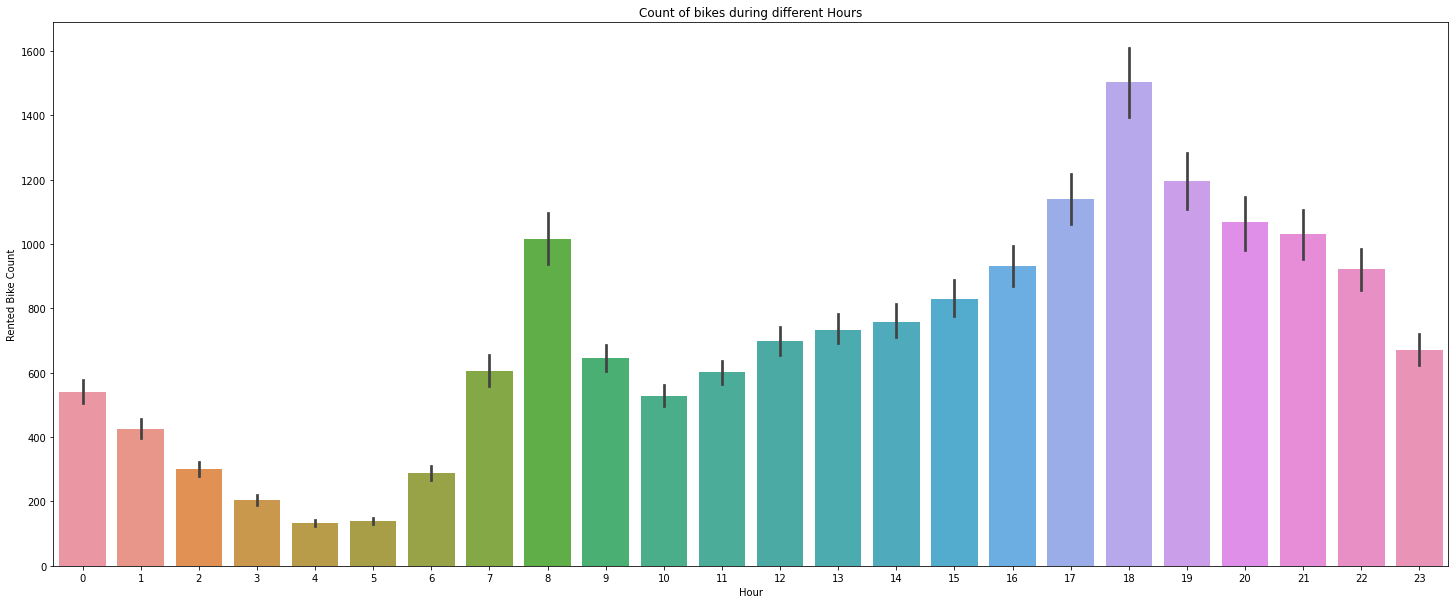

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(data=bike, x='Hour', y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes during different Hours')

**From the above chart of Count of bikes during different Hours it is shown that everyday evening 5pm to 8 pm the count of rented bike is high as compared to other time.**

[Text(0.5, 1.0, 'Count of bikes during different Hours')]

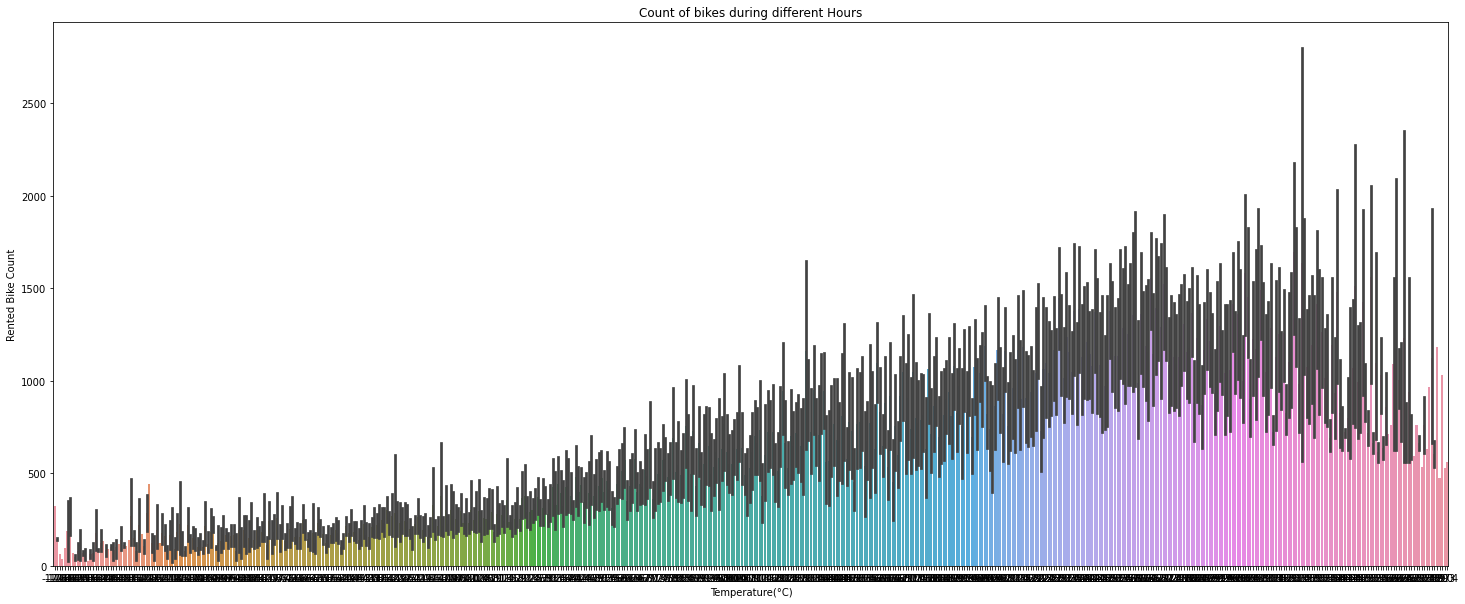

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(data=bike, x='Temperature(°C)', y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes during different Hours')

[Text(0.5, 1.0, 'Relation between humidity and users')]

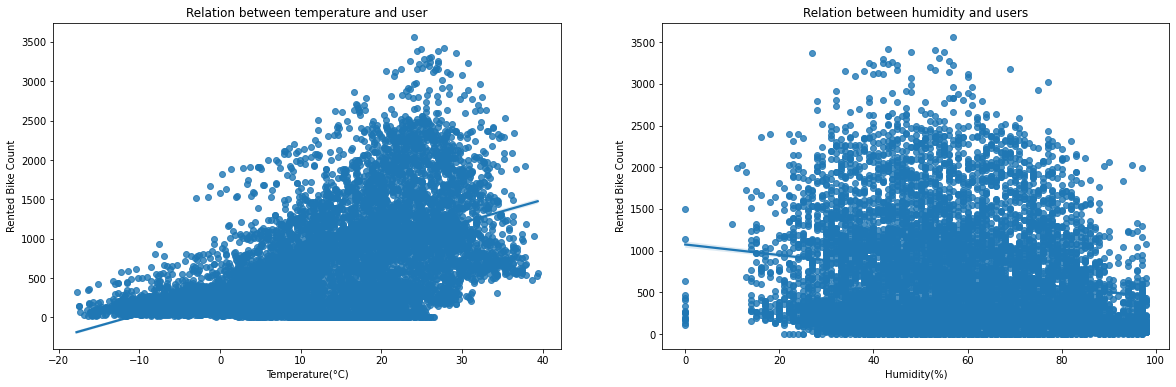

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=bike['Temperature(°C)'], y=bike['Rented Bike Count'], ax=ax1)
ax1.set(title="Relation between temperature and user")
sns.regplot(x=bike['Humidity(%)'], y=bike['Rented Bike Count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

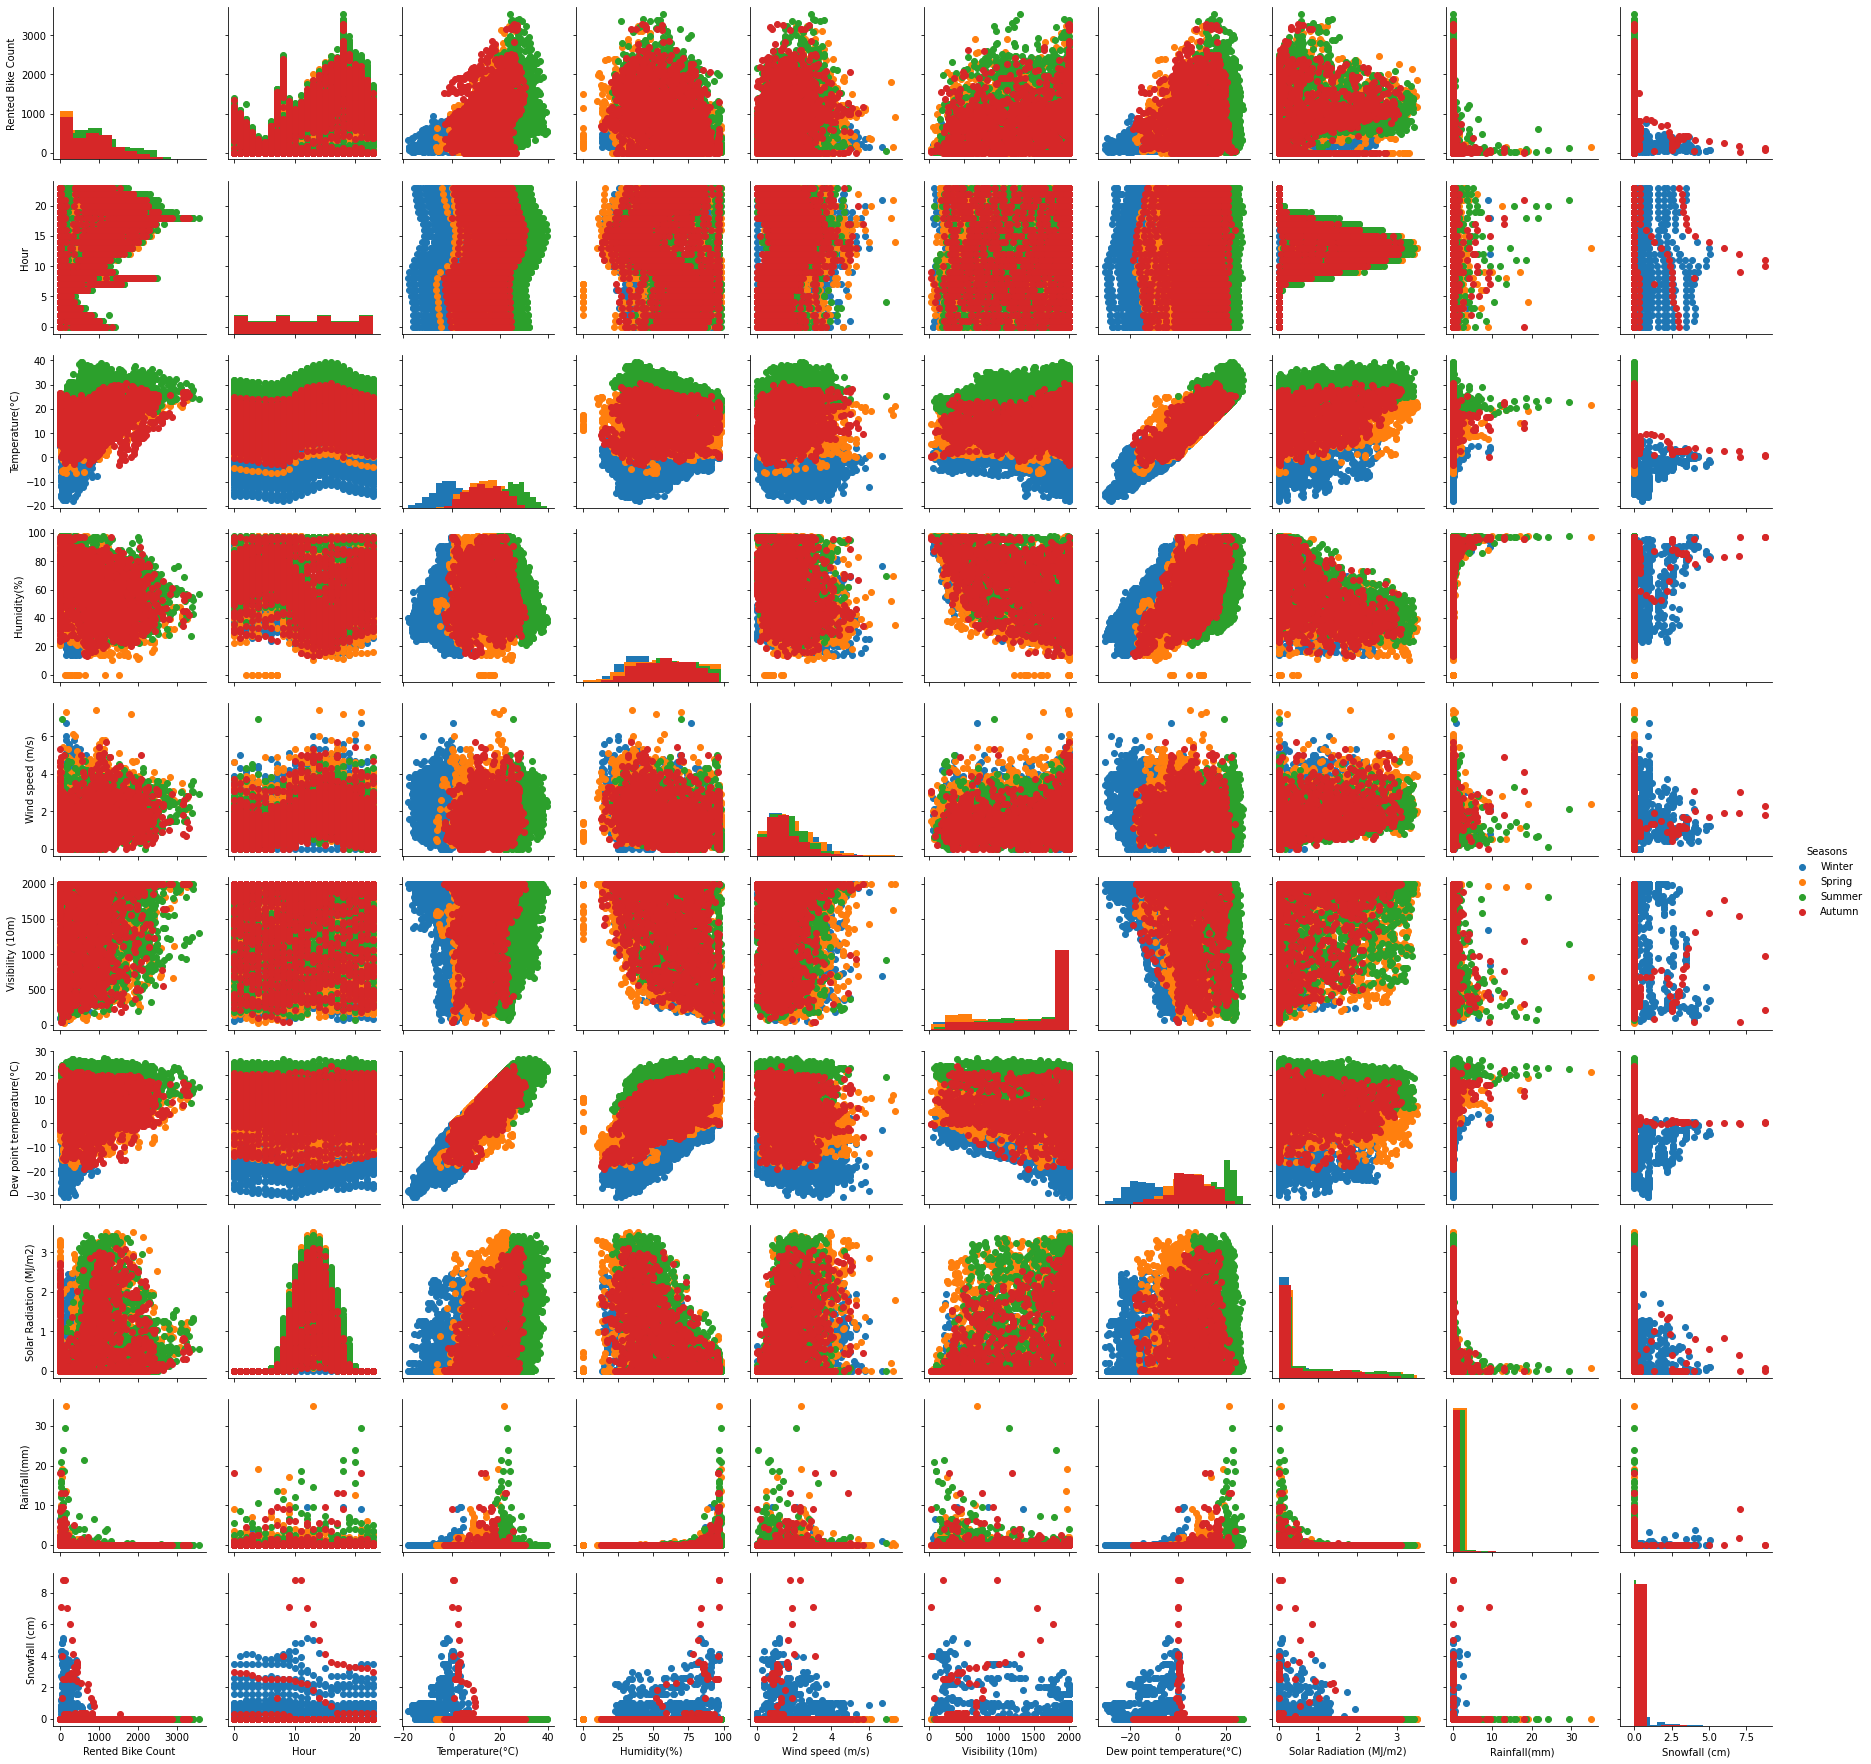

In [ ]:
import seaborn
# loading dataset

  
# PairGrid object with hue
graph = seaborn.PairGrid(bike, hue ='Seasons')
# type of graph for diagonal
graph = graph.map_diag(plt.hist)
# type of graph for non-diagonal
graph = graph.map_offdiag(plt.scatter)
# to add legends
graph = graph.add_legend()
# to show
plt.show()

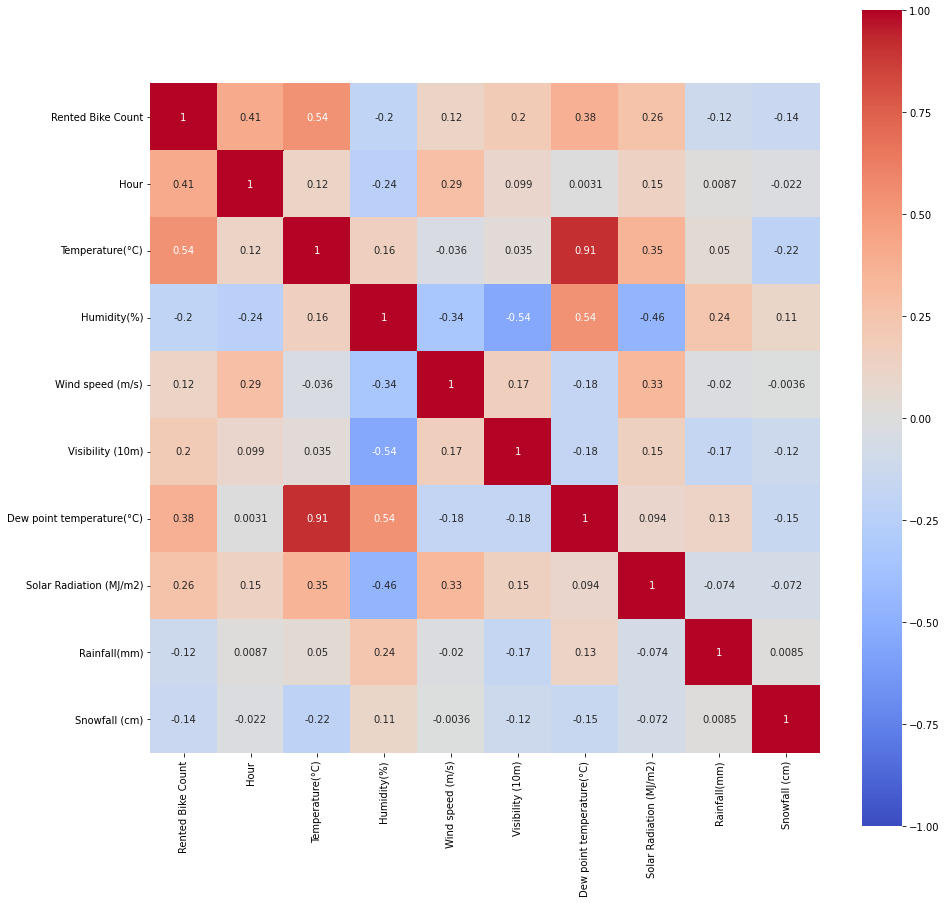

In [ ]:
#correlation plot
plt.figure(figsize=(15,15))
sns.heatmap(bike.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

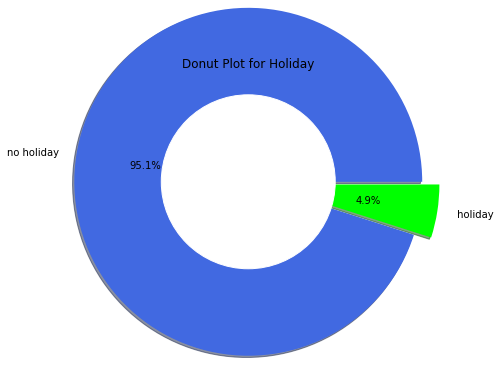

In [ ]:
#To get the Donut Plot to analyze bike booking percentage
data = bike['Holiday'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['no holiday',' holiday'],colors=['royalblue' ,'lime'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Holiday')
plt.show()

In [43]:
# now counitng the rented bike per season wise 
count_per_season=pd.DataFrame(bike.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))
count_per_season

,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


**From the above table it is clearly shown that most of the bike were booked during summer season**